# Importing the essential libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as disp
import scipy.io.wavfile
from scipy.fftpack import dct
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
def create( address):
  files  = lb.util.find_files(address,ext = ['wav'])
  files = np.asarray(files)
  return files

    

In [3]:

def appendItems(list_1, list_2):
  for items in list_1:
    list_2.append(items)


# Reading Y files to test on and converting it into dataframe

In [4]:
Y = pd.read_csv("Test_Forward.csv")
Y_back = pd.read_csv("Test_Back.csv")
Y_left = pd.read_csv("Test_Left.csv")
Y_right = pd.read_csv("Test_Right.csv")
Y_stop = pd.read_csv("Test_Stop.csv")


Y.columns = ['b']
Y_back.columns = ['b']
Y_left.columns = ['b']
Y_right.columns = ['b']
Y_stop.columns = ['b']

Y = Y.iloc[:,:].values
Y_back = Y_back.iloc[:,:].values
Y_left = Y_left.iloc[:,:].values
Y_right = Y_right.iloc[:,:].values
Y_stop = Y_stop.iloc[:,:].values

Y = Y.tolist()
Y_back = Y_back.tolist()
Y_left = Y_left.tolist()
Y_right = Y_right.tolist()
Y_stop = Y_stop.tolist()

appendItems(Y_back,Y)
appendItems(Y_left,Y)
appendItems(Y_right,Y)
appendItems(Y_stop,Y)

print(Y)


[['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward'], ['Forward']

In [5]:
Y = np.array(Y)

In [6]:
y = pd.DataFrame(Y, columns = ['b'])

# Getting the files and converting it into machine format 

In [8]:
audio_array = []

In [9]:
i = 0
def getFiles(files):
  for file in files:
    signal, sr = lb.load(file,sr=16000)
    audio_array.append(np.array([signal]))

In [10]:
files_forward = create("Forward")
files_back = create("Back")
files_right = create("Right")
files_left = create("Left")
files_stop = create("Stop")

In [11]:
getFiles(files_forward)
getFiles(files_back)
getFiles(files_right)
getFiles(files_left)
getFiles(files_stop)

In [12]:
np.shape(audio_array)

(400, 1, 16000)

In [ ]:
audio_array = np.asarray(audio_array)
audio_array=audio_array.reshape(400, 16000)

# Understanding the data with the help of visualisation

In [13]:
import os
import wave

import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
    
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

D:\conda\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


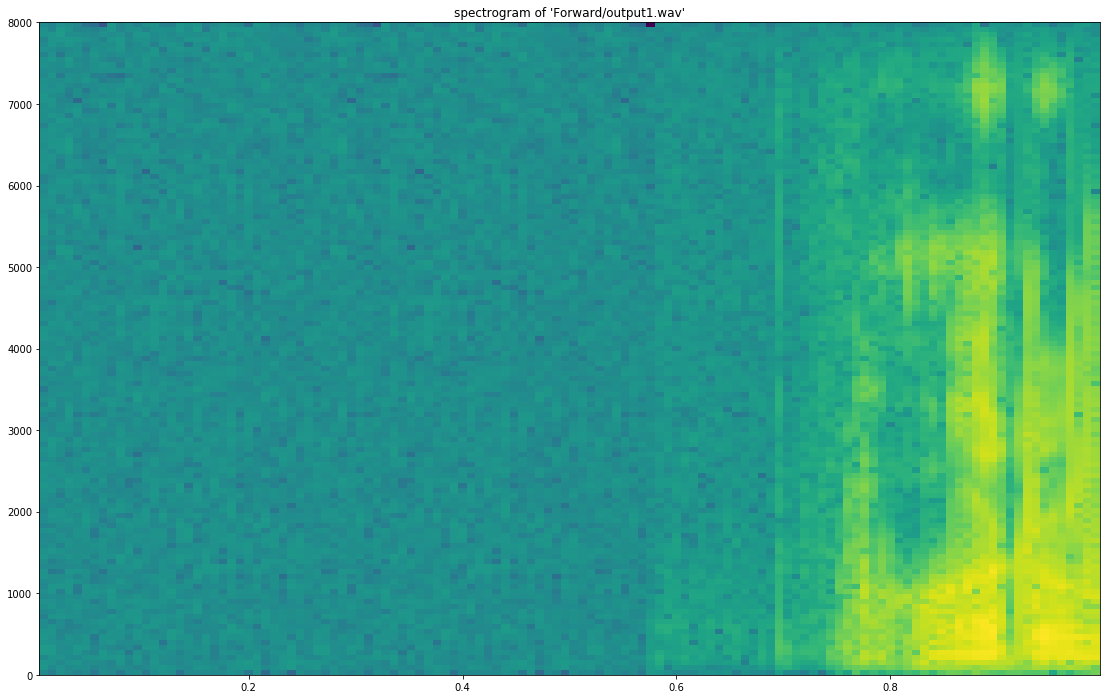

In [15]:
graph_spectrogram("Forward/output1.wav")

D:\conda\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


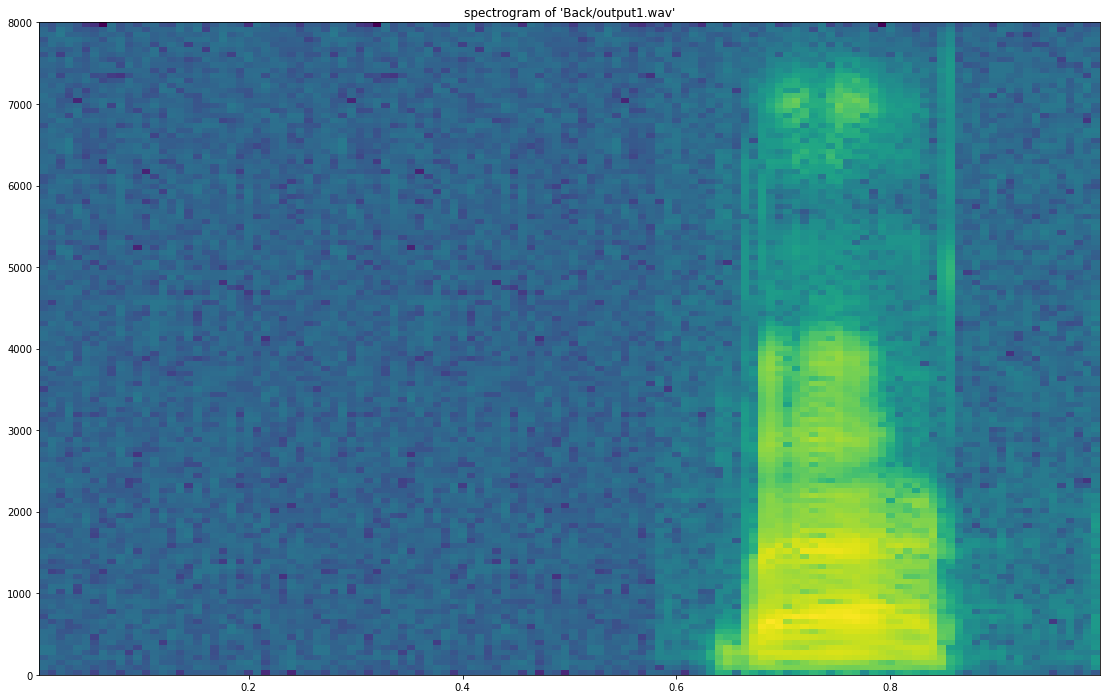

In [16]:
graph_spectrogram("Back/output1.wav")

D:\conda\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


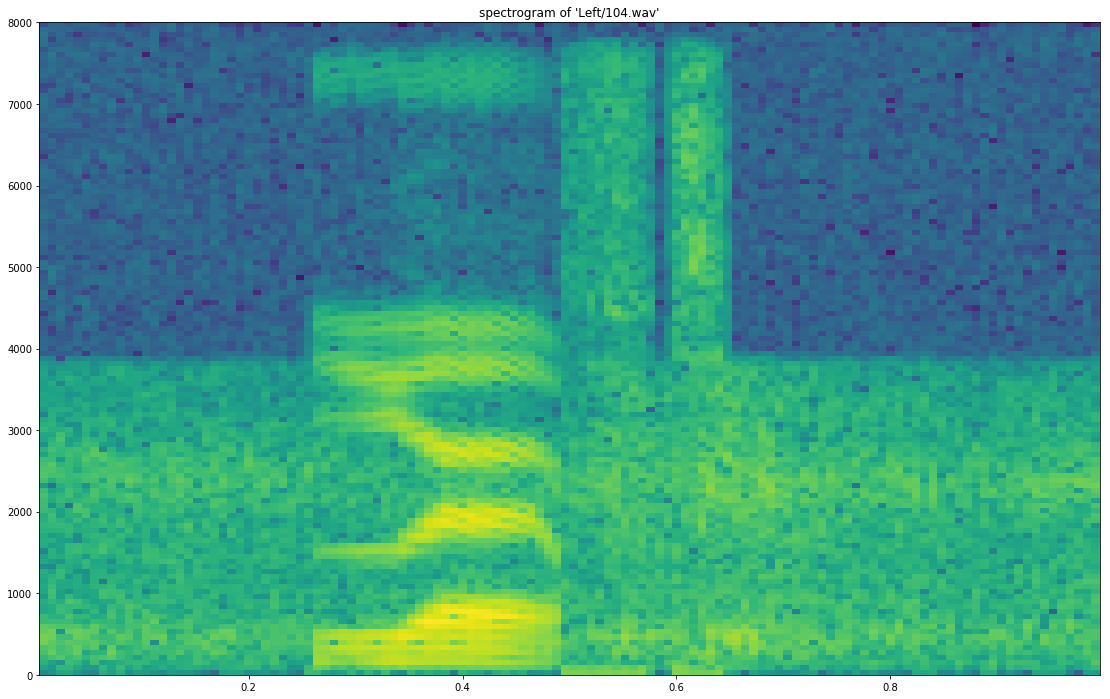

In [18]:
graph_spectrogram("Left/104.wav")

D:\conda\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


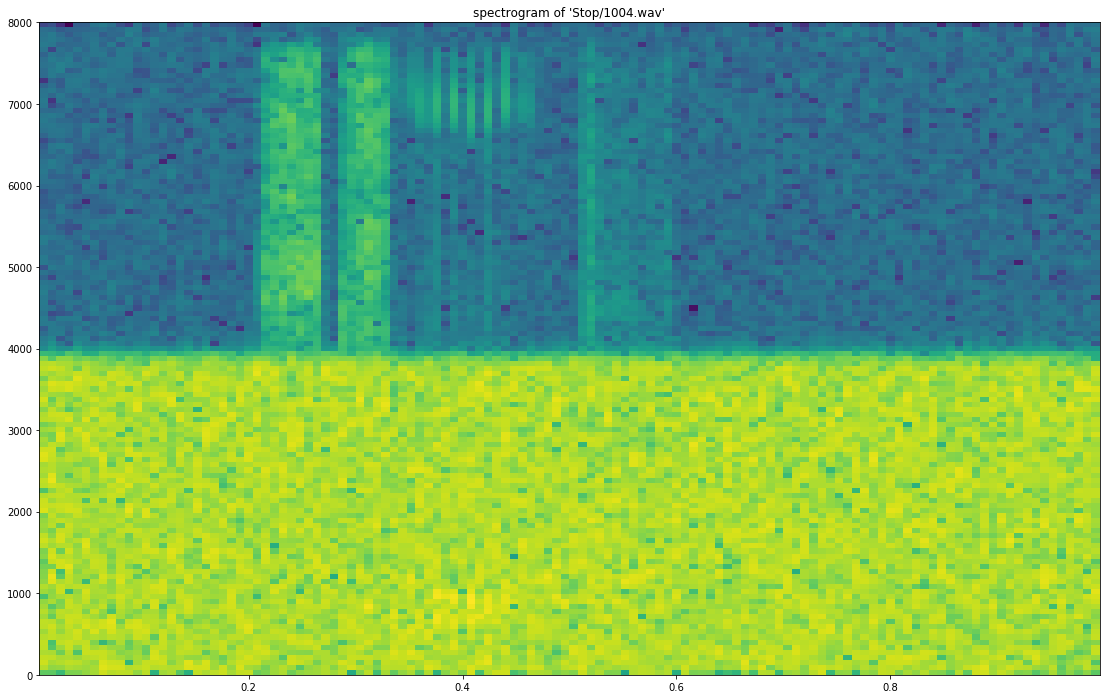

In [19]:
graph_spectrogram("Stop/1004.wav")

D:\conda\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


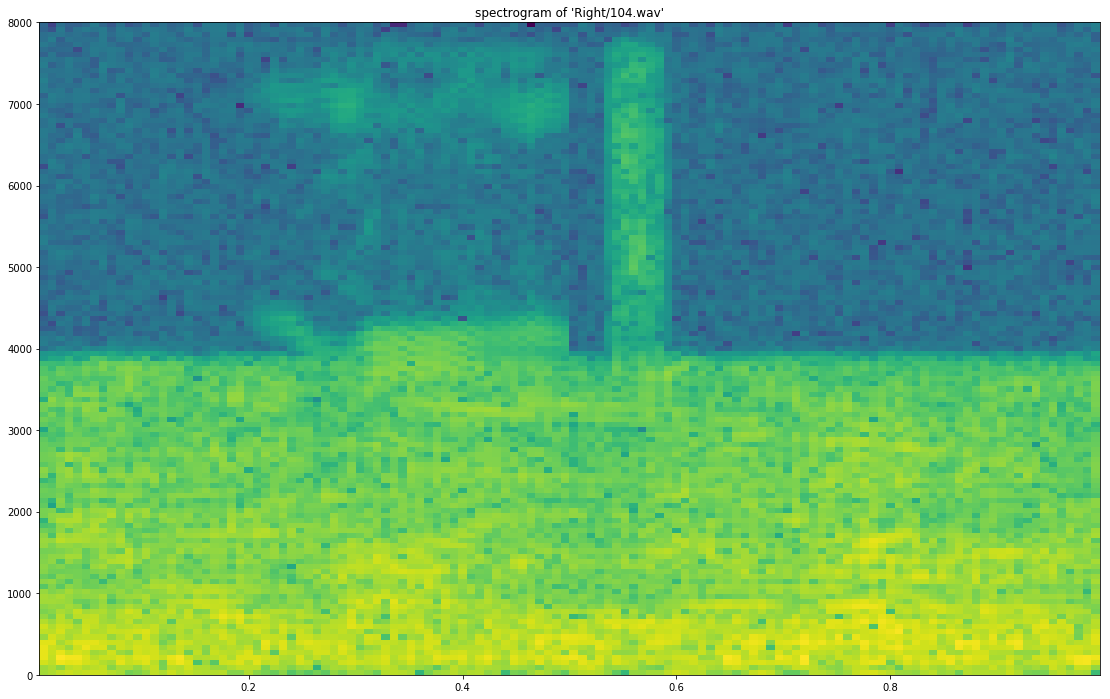

In [20]:
graph_spectrogram("Right/104.wav")

# Feature Extraction

In [22]:
def mfcc(mylist):
  for samples in mylist: 
    mfcc_sound = lb.feature.mfcc(y=samples, sr=16000, n_mfcc=60)
    samples = np.mean(mfcc_sound.T,axis=0)

In [23]:
mfcc(audio_array)

In [24]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
#X = np.array(ano.a.tolist())
X = audio_array
y = np.array(y.b.tolist())
# Encode the classification labels
le = LabelEncoder()
y1 = le.fit_transform(y)
invert, data = np.unique(y1, return_inverse=True)
yy = to_categorical(data)

# Splitting the dataset into training and test sets

In [25]:
# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

# Building our model

In [27]:
num_labels = yy.shape[1]
model = Sequential()
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
'''model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))'''
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 50
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 320 samples, validate on 80 samples
Epoch 1/50
320/320 [==============================] - 2s 5ms/step - loss: 1.6036 - accuracy: 0.1906 - val_loss: 1.5805 - val_accuracy: 0.2375
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 1.5264 - accuracy: 0.1969 - val_loss: 1.5151 - val_accuracy: 0.2250
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 1.4729 - accuracy: 0.2531 - val_loss: 1.4834 - val_accuracy: 0.4250
Epoch 4/50
320/320 [==============================] - 1s 2ms/step - loss: 1.4035 - accuracy: 0.3219 - val_loss: 1.4696 - val_accuracy: 0.3875
Epoch 5/50
320/320 [==============================] - 1s 2ms/step - loss: 1.3426 - accuracy: 0.4000 - val_loss: 1.4552 - val_accuracy: 0.3250
Epoch 6/50
320/320 [==============================] - 1s 2ms/step - loss: 1.2725 - accuracy: 0.4688 - val_loss: 1.3963 - val_accuracy: 0.4000
Epoch 7/50
320/320 [==============================] - 1

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               4096256   
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [30]:
model.predict(x_test)

array([[1.18017573e-25, 1.00000000e+00, 2.67543527e-22, 0.00000000e+00,
        3.47296476e-26],
       [1.00368615e-02, 3.80646344e-03, 9.19242799e-01, 6.17338344e-02,
        5.18006412e-03],
       [1.14550744e-10, 5.39126397e-08, 2.72322502e-13, 1.88283844e-18,
        1.00000000e+00],
       [2.05645833e-07, 2.98043983e-06, 4.93500556e-06, 1.03915658e-08,
        9.99991894e-01],
       [6.15032816e-11, 2.24832271e-11, 9.99999881e-01, 1.58109657e-07,
        1.36300460e-09],
       [6.26981139e-01, 5.43776900e-02, 9.69178826e-02, 9.19827521e-02,
        1.29740596e-01],
       [3.41203948e-03, 9.74139571e-03, 1.75101906e-02, 8.75884853e-03,
        9.60577488e-01],
       [7.22185309e-23, 1.00000000e+00, 8.80673721e-17, 0.00000000e+00,
        2.47494637e-24],
       [1.27432585e-01, 3.37854251e-02, 6.24395795e-02, 4.12283152e-01,
        3.64059240e-01],
       [2.37777140e-02, 3.09831053e-02, 8.67824629e-02, 2.43993774e-02,
        8.34057271e-01],
       [7.41359429e-04, 2.5427

# Testing our model by taking user input

In [100]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
import time
import winsound
import soundfile as sf

import sounddevice as sd
import wave

freq=500
dur=1000
CHANNELS = 1
RATE = 16000
RECORD_SECONDS = 1
def recorder():
    
    i=1
    print('Hiya! Recording will be starting in 3 seconds')
    for k in range(0,3):
        k=3-k
        print('recording in', + k, 'seconds')
        time.sleep(1)

    winsound.Beep(freq,dur)
    myrecording = sd.rec(int(RECORD_SECONDS * RATE), samplerate=RATE,
                     channels=CHANNELS, blocking=True, dtype='int16')
    print(myrecording, 'myrecording') 

    wf = wave.open('myrecording.wav'.format(i), 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(2)
    wf.setframerate(RATE)
    wf.writeframes(myrecording)
    wf.close()
    recording ,sr= lb.load("myrecording.wav",sr=16000,res_type = 'kaiser_fast')
    return recording

In [101]:
def predict():
    audio = recorder()
   
    
    #mfcc_sound = lb.feature.mfcc(y=audio, sr=16000, n_mfcc=60)
    #audio = np.mean(mfcc_sound.T,axis=0)
    answer = model.predict(np.array([audio]))
    answer = np.around(answer)
    answer = invert[answer.argmax(1)]
    answer = le.inverse_transform(answer)
    print(answer)

In [104]:
predict()

Hiya! Recording will be starting in 3 seconds
recording in 3 seconds
recording in 2 seconds
recording in 1 seconds
[[    1]
 [    1]
 [   -1]
 ...
 [ -399]
 [  -55]
 [-2348]] myrecording
['Forward']


In [105]:
predictions = np.around(model.predict(x_test))
predictions = invert[predictions.argmax(1)]
predictions = le.inverse_transform(predictions)
predictions

array(['Forward', 'Left', 'Stop', 'Stop', 'Left', 'Back', 'Stop',
       'Forward', 'Back', 'Stop', 'Stop', 'Right', 'Back', 'Forward',
       'Right', 'Back', 'Back', 'Back', 'Stop', 'Right', 'Forward',
       'Back', 'Right', 'Forward', 'Stop', 'Stop', 'Left', 'Back', 'Left',
       'Back', 'Stop', 'Back', 'Right', 'Back', 'Right', 'Back', 'Back',
       'Right', 'Forward', 'Left', 'Right', 'Back', 'Stop', 'Back',
       'Back', 'Stop', 'Left', 'Back', 'Right', 'Left', 'Left', 'Stop',
       'Left', 'Right', 'Forward', 'Back', 'Right', 'Right', 'Forward',
       'Right', 'Back', 'Forward', 'Back', 'Forward', 'Stop', 'Stop',
       'Back', 'Stop', 'Right', 'Forward', 'Back', 'Forward', 'Forward',
       'Forward', 'Forward', 'Stop', 'Left', 'Stop', 'Back', 'Forward'],
      dtype='<U7')

In [108]:
y_test_st=invert[y_test.argmax(1)]
y_test_st=le.inverse_transform(y_test_st)

